In [ ]:
from sklearn.datasets import make_classification

In [ ]:
x, y = make_classification(n_samples = 2500, n_classes = 2,n_features = 2, n_redundant = 0)

In [ ]:
x.shape,y.shape

((2500, 2), (2500,))

In [ ]:
x

array([[ 1.0180296 , -1.10001667],
       [ 1.54264678,  0.42488006],
       [ 0.8479591 ,  1.18268994],
       ...,
       [ 0.71997315, -2.03106982],
       [-0.87741151, -0.91851004],
       [ 1.05341902, -0.85694367]])

In [ ]:
y

array([1, 1, 1, ..., 1, 0, 1])

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


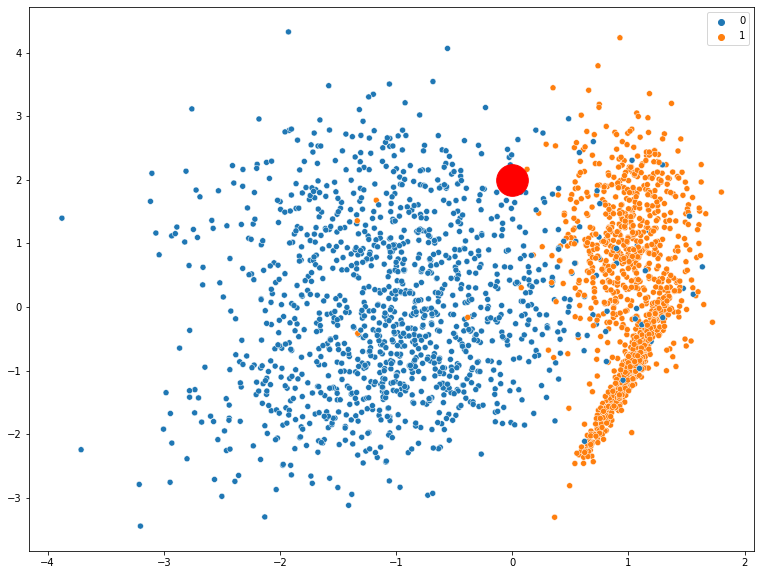

In [ ]:
plt.figure(figsize = (13, 10))
#plt.scatter(x[:, 0],x[:,1], c = y)
sns.scatterplot(x[:, 0], y = x[:,1], hue = y)
plt.scatter(0 , 2 , c = "red" , s = 1000)
plt.show()


Implementing KNN from scratch


In [ ]:
import numpy as np


In [ ]:
x.shape[0]

2500

In [ ]:
def KNN(k,a,b):
  total_distances = []
  for i in range(x.shape[0]):
    # Step 1: Calculting distance from all the points
    distance = np.sqrt((x[i][0] - a) ** 2 + (x[i][1] - b) ** 2)

    # Step 2: Append distance with category
    total_distances.append([distance, y[i]])

  # Step 3: Sorting the distance in ascending order based on distance
  total_distances.sort()

  # Step 4: Fetching out initial k points from the list
  total_distances = total_distances[: k]

  # Step 5: Selecting the most occuring category from the initial k points
  count_0, count_1 = 0,0
  for i in range(k):
    if total_distances[i][1] == 0:
      count_0 += 1
    else:
      count_1 +=1
  
  # Step 6: Return the most occuring category
  return 1 if count_1 > count_0 else 0



In [ ]:
KNN(10,0,2)



0

In [ ]:
from sklearn.neighbors import KNeighborsClassifier

In [ ]:
classifier = KNeighborsClassifier(n_neighbors = int(np.sqrt(x.shape[0])))

In [ ]:
classifier.fit(x,y)

KNeighborsClassifier(n_neighbors=50)

In [ ]:
classifier.predict(np.array([0,2]).reshape(1,-1))[0]

0

In [ ]:
import pickle
pickle.dump(classifier, open('knn.pkl', 'wb'))